In [5]:
import pandas as pd
import yaml


In [6]:
try:
    with open (r"config.yaml",'r') as file:
        config=yaml.safe_load(file)
except Exception as p:
    print("Error reading the config file")

In [7]:
df_final_demo=pd.read_csv(config["data"]["final_demo"])
df_experiment_clients=pd.read_csv(config["data"]["final_experiment"])
df_pt1=pd.read_csv(config["data"]["pt1"])
df_pt2=pd.read_csv(config["data"]["pt2"])

In [14]:
#Se verifican valores nulos, encontrando 14 filas con valores nulos y una fila con un único valor nulo.
#Se eliminan las filas con todos valores nulos y se analiza el valor nulo único. 
df_final_demo.isnull().sum()


client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [19]:
#Se eliminan todas las filas con 2 o más valores nulos.
df_finall=df_final_demo.dropna(thresh=2)


In [24]:
#Se analiza la fila con un único valor nulo, 
df_finall.loc[df_finall['clnt_age'].isna()]
#Se extrae el client id para observar su registro en df:experiment, y se observa variation= Control
df_experiment_clients.loc[df_experiment_clients['client_id']==4666211]
#Por lo tanto, se elimina la df_finall, PARA REALIZAR ANÁLISIS UNIVARIABLE Y BI VARIABLE.

,client_id,Variation
38552,4666211,Control


In [ ]:
#Dataframe df_finall limpio ARA REALIZAR ANÁLISIS UNIVARIABLE Y BI VARIABLE.
df_finall=df_finall.dropna(how="any")
df_finall.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [34]:
df_finall.sample(10)
df_finall_num= df_finall[['clnt_tenure_yr','clnt_tenure_mnth','clnt_age','bal','calls_6_mnth','logons_6_mnth']]
df_finall_cat=df_finall[['client_id','gendr','num_accts']]

### EDA univariable numéricas

In [50]:
def basic_stat(df, columna, show_outliers, bins):
    import pandas as pd
    import seaborn as sb
    import matplotlib.pyplot as plt  # Importamos específicamente pyplot

    """
    Calcula estadísticas descriptivas básicas para una columna de un DataFrame
    y genera un boxplot y un histograma para visualizar la distribución de los datos.

    Parámetros:
    df (pandas.DataFrame): El DataFrame que contiene los datos.
    columna (str): El nombre de la columna de interés dentro del DataFrame para realizar los cálculos y graficar.
    show_outliers (bool): Si es True, se mostrarán los valores atípicos en el boxplot. Si es False, no se mostrarán.
    bins (int): El número de bins (intervalos) a usar en el histograma para dividir los datos.

    No devuelve ningún valor. La función imprime las estadísticas descriptivas y muestra los gráficos de boxplot y histograma.
    
    Estadísticas calculadas:
    - Moda
    - Media
    - Mediana
    - Varianza
    - Desviación estándar
    - Rango (diferencia entre el valor máximo y mínimo)
    - Rango intercuartil (diferencia entre los cuartiles 75% y 25%)
    - Asimetría (skewness)
    - Curtosis (kurtosis)

    Los gráficos generados son:
    - Boxplot: Muestra la distribución de los datos con énfasis en los valores atípicos.
    - Histograma: Muestra la distribución de frecuencia de los datos en intervalos (bins).
    """

    # Calculamos la moda de la columna (valor más frecuente)
    # Tomamos solo el primer valor de la moda si hay varios
    moda = df[columna].mode().iloc[0]

    # Calculamos la media de la columna
    media = df[columna].mean()

    # Calculamos la mediana de la columna
    mediana = df[columna].median()

    # Calculamos la varianza de la columna (mide la dispersión de los datos)
    varianza = df[columna].var()

    # Calculamos la desviación estándar (raíz cuadrada de la varianza)
    desest = df[columna].std()

    # Calculamos el rango, que es la diferencia entre el valor máximo y mínimo de la columna
    rango = df[columna].max() - df[columna].min()

    # Calculamos el rango intercuartil (diferencia entre el cuartil 75 y el cuartil 25)
    rango_i = df[columna].quantile(0.75) - df[columna].quantile(0.25)

    # Calculamos la asimetría de la distribución de los datos (skewness)
    skewness = df[columna].skew()

    # Calculamos la curtosis de la distribución (kurtosis)
    kurtosis = df[columna].kurt()

    # Imprimimos los resultados calculados
    print(f"media: {media} \n mediana: {mediana} \n moda: {moda}\n varianza: {varianza}\n desviación estándar: {desest}\n rango:{rango}\n rango intercuartil: {rango_i} \n Asimetría: {skewness} \n Curtosis: {kurtosis}")

    # Creamos el boxplot con seaborn
    # El parámetro show_outliers controla si mostrar los outliers o no
    sb.boxplot(x=df[columna], color='skyblue', showfliers=show_outliers)

    # Agregamos título y etiquetas a los ejes del boxplot
    plt.title(f'Boxplot de {columna}')
    plt.xlabel(columna)  # Usamos el nombre de la columna directamente

    # Mostramos el boxplot
    plt.show()

    # Creamos el histograma de la columna con un número de bins especificado
    plt.hist(df[columna], bins=bins, color='skyblue', edgecolor='black')

    # Agregamos título y etiquetas al histograma
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)  # Usamos el nombre de la columna directamente
    plt.ylabel('Frecuencia')  # Etiqueta para el eje y

    # Mostramos el histograma
    plt.show()


media: 12.053007337734085 
 mediana: 11.0 
 moda: 6.0
 varianza: 47.222325819018934
 desviación estándar: 6.8718502471327865
 rango:60.0
 rango intercuartil: 10.0 
 Asimetría: 1.0366247018480386 
 Curtosis: 1.0709232170805043


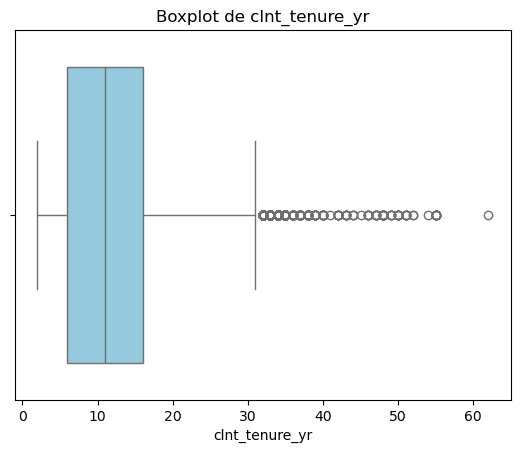

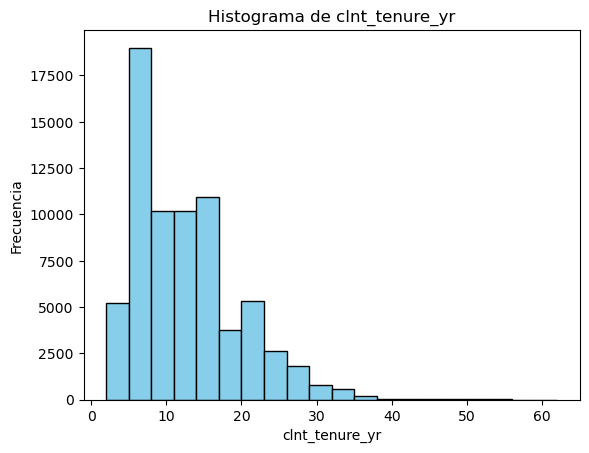

media: 150.6599994333796 
 mediana: 136.0 
 moda: 58.0
 varianza: 6738.811373739952
 desviación estándar: 82.09026357455525
 rango:716.0
 rango intercuartil: 110.0 
 Asimetría: 1.0506517922170102 
 Curtosis: 1.102446928017626


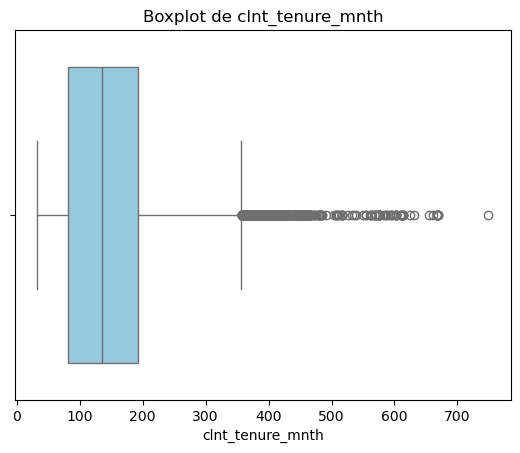

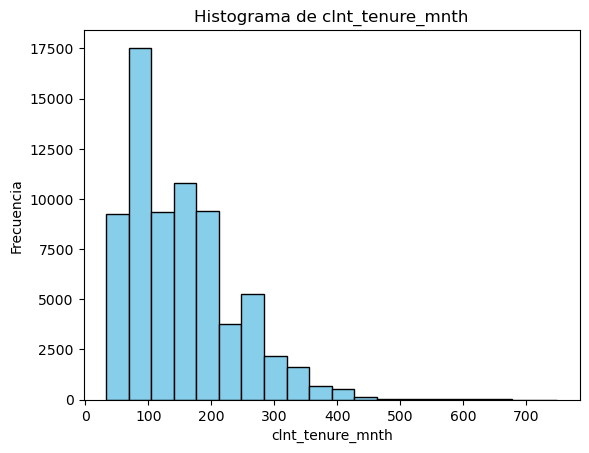

media: 46.442240133722414 
 mediana: 47.0 
 moda: 58.5
 varianza: 243.08778114182405
 desviación estándar: 15.59127259532794
 rango:82.5
 rango intercuartil: 26.5 
 Asimetría: 0.08182349158703761 
 Curtosis: -0.9271048487356293


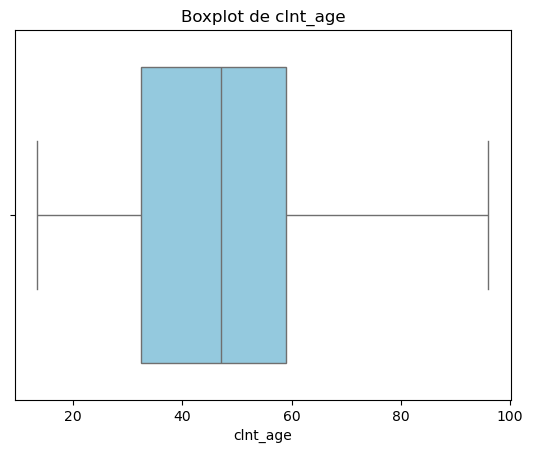

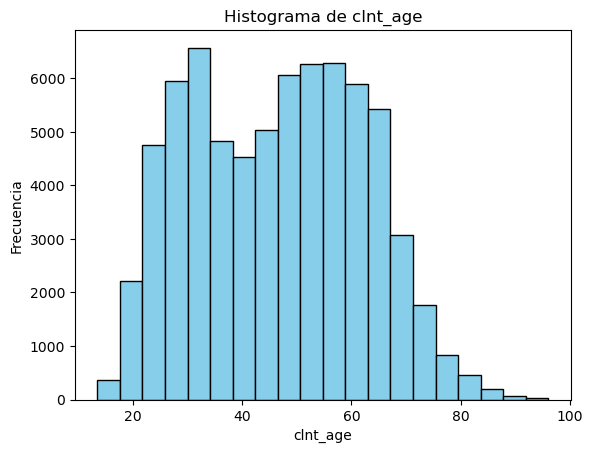

media: 147446.7265281752 
 mediana: 63334.59 
 moda: 31188.62
 varianza: 90908632017.218
 desviación estándar: 301510.5835907224
 rango:16306250.73
 rango intercuartil: 100199.51999999999 
 Asimetría: 11.164302129665488 
 Curtosis: 278.2039860394955


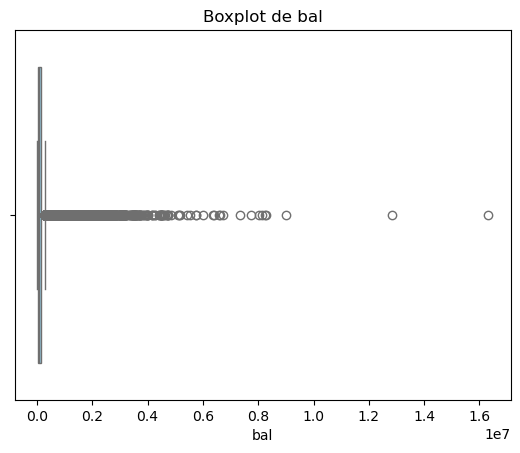

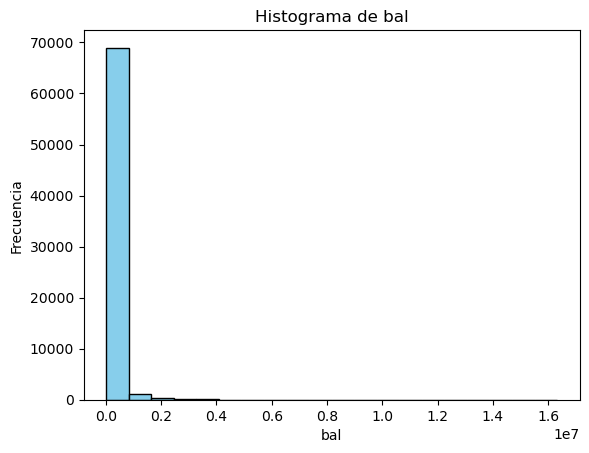

media: 3.382468765050854 
 mediana: 3.0 
 moda: 6.0
 varianza: 5.002356371646623
 desviación estándar: 2.2365948161539277
 rango:7.0
 rango intercuartil: 5.0 
 Asimetría: 0.051141800934866845 
 Curtosis: -1.3256714399170726


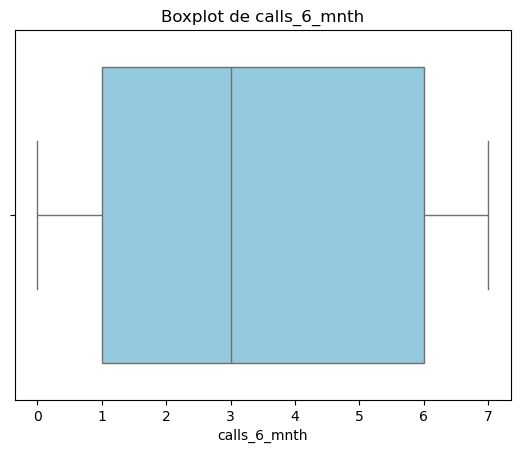

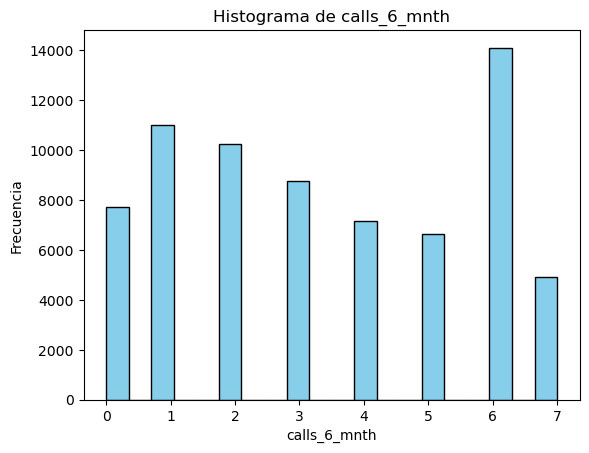

media: 5.566719551236649 
 mediana: 5.0 
 moda: 9.0
 varianza: 5.538003072737695
 desviación estándar: 2.353296214406018
 rango:8.0
 rango intercuartil: 3.0 
 Asimetría: -0.03442606117380175 
 Curtosis: -1.0607568785264696


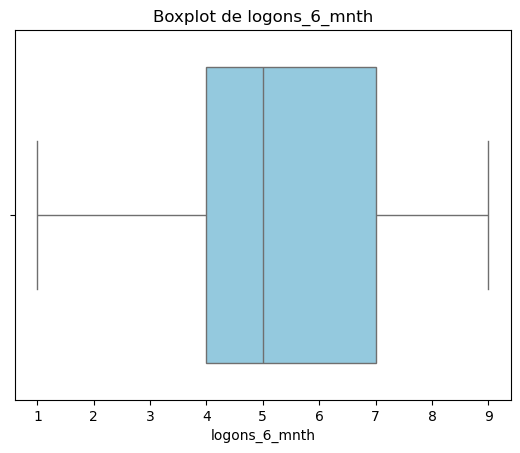

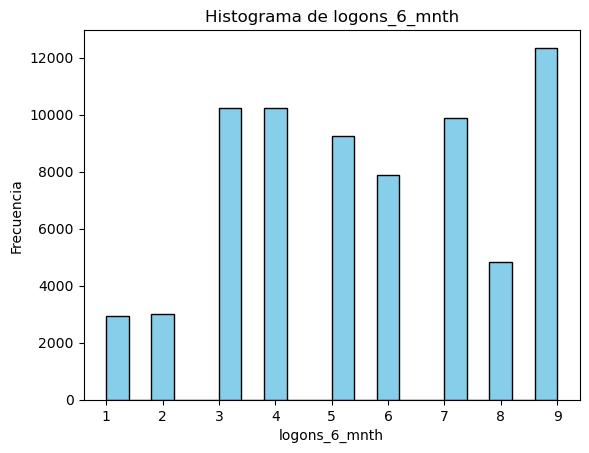

In [51]:
for columna in df_finall_num.columns:
    basic_stat(df_finall_num,columna,True,20)

### EDA univariable categóricas

In [ ]:
def categ_basic_stat(df,columna):
    frec= df[columna].value_counts().reset_index()


    return frec


In [55]:
categ_basic_stat(df_finall_cat,"gendr")

,gendr,count
0,U,24122
1,M,23724
2,F,22745
3,X,3


In [ ]:
df_experiment_clients.head() 


,client_id,Variation
38552,4666211,Control


In [10]:
df_pt1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [11]:
df_pt2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
